# Assignment 1

## Exploring data in Python

For this assignment I have provided a portion of the data from the [Ingenium Canada Museum Collection](https://ingeniumcanada.org/centre/the-ingenium-research-institute) dataset. I've cleaned it up abit!

The assignment asks you to explore the data and provide some analysis and visualisations. It will mostly ask you to use approaches to data analysis and access that we have seen before, but also may involve doing a bit of further research into libraries like NumPy and MatplotLib.

Complete your answers in this Jupyter Notebook, highlighting which cell answers each question.

I have provided some code to load in and format the dataset, run this once at the beginning!

In [4]:
##Setup code to load in the dataset 
import numpy as np
file = open('data/museum_data_assignment-1.tsv')
dataset = np.loadtxt(file, delimiter = "\t",  dtype = 'O')
headings = dataset[0]
dataset = dataset[1:]
dataset = np.array([x for x in dataset if not x[2] == "Unknown"])
dataset[:,2] = [int(x) for x in dataset[:,2]]
dataset[:,6] = [float(x[:-2]) for x in dataset[:,6]]
dataset[:,7] = [float(x[:-2]) for x in dataset[:,7]]
dataset[:,8] = [float(x[:-2]) for x in dataset[:,8]]
dataset[:,5] = [x.replace(";","->").split("->")[0] for x in dataset[:,5]]
print("Column names\n")
print(headings)
print("\nDataset Shape\n")
print(dataset.shape)

Column names

['artifactNumber' 'ObjectName' 'BeginDate' 'group1' 'category1' 'material'
 'Length' 'Width' 'Height' 'image']

Dataset Shape

(6738, 10)


### Question 1

Using either ``sorted()`` or [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html?highlight=max#numpy.argmax), find and display the images for 

    - Oldest
    
    - Newest 
        
**You will have to do some extra research to find out how to display images in a Jupyter notebook**

In [5]:
from IPython import display
from PIL import Image

http://source.techno-science.ca/artifacts-artefacts/images/1966.0719.001.aa.cs.png


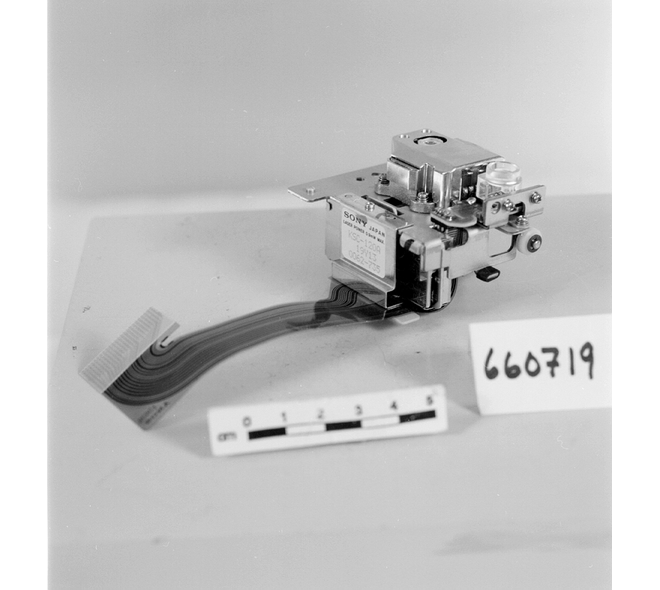

In [6]:
date = dataset[:,2]
x = np.argmax(date,axis=0)
newest=dataset[x,-1]
print (newest)
display.Image(newest)

http://source.techno-science.ca/artifacts-artefacts/images/1980.0657.001.aa.cs.png
http://source.techno-science.ca/artifacts-artefacts/images/1980.0657.001.aa.cs.png


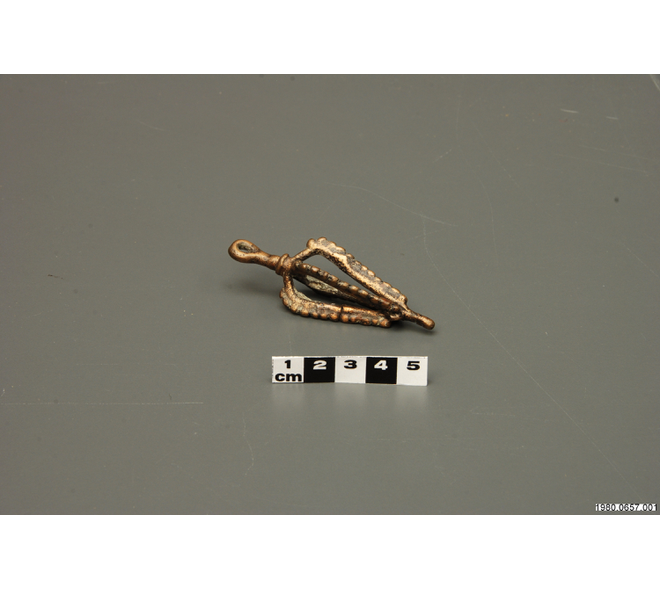

In [7]:
i = np.argmin(date,axis=0)
print (dataset[i,-1])
oldest=dataset[i,-1]
print (oldest)
display.Image(oldest)

### Question 2

Assuming the volume of an object is ``length x width x height``

1. Create a new 1-D array containing the volumes of each object 


2. Remove the **top and bottom 20%** (e.g. the biggest and smallest objects)


3. Plot a histogram of the remaining object's volumes. Label the axes appropriately.



In [8]:
length = dataset[:,-4]
width = dataset[:,-3]
height = dataset[:,-2]
volume = length*width*height

sorted_m = sorted(volume)
total_m = len(sorted_m)
print(total_m)

6738


In [9]:
mini = round(0.2*total_m)
max = round(0.8*total_m)
print(mini)
print(max)

1348
5390


Text(0, 0.5, 'number')

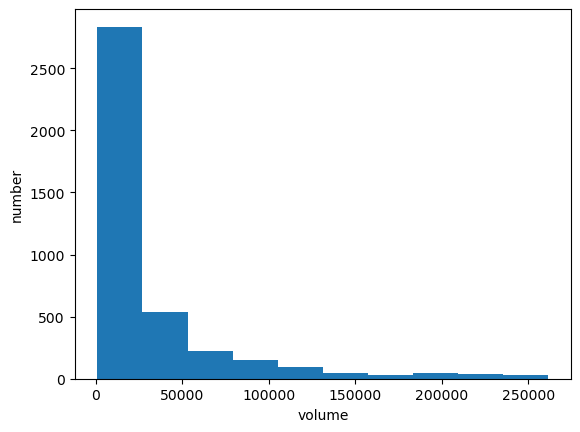

In [10]:
adi = sorted_m[mini:max]
import matplotlib.pyplot as plt
plt.hist(adi)
plt.xlabel('volume')
plt.ylabel('number')

### Question 3 

What is the most common category and group? What percentage of the total items to they each make up?

**HINT** What kind of ``Average`` is ``most common`` another word for?

In [11]:
from collections import Counter

[('metal', 3759), ('wood', 1744), ('synthetic', 515), ('Unknown', 199), ('skin', 129), ('paper', 121), ('glass', 111), ('fibre', 89), ('stone', 27), ('resin', 24), ('ceramic', 15), ('wood - possible', 2), ('paper - possible', 1), ('plant', 1), ('metal - possible', 1)]


In [13]:
group = dataset[:,3]
category = dataset[:,4]

In [16]:
G = Counter(group).most_common(1)
C = Counter(category).most_common(1)
print (G,C)

[('Technology', 2914)] [('Still cameras', 695)]


In [19]:
percentage_G = int(G[0][1])/len(category)*100
percentage_C = int(C[0][1])/len(group)*100
print('Most common group: ' +str(G[0][0])+'  Percentage: '+str(percentage_G)+'%')
print('Most common category: ' +str(C[0][0])+'  Percentage: '+str(percentage_C)+'%')

Most common group: Technology  Percentage: 43.247254378153755%
Most common category: Still cameras  Percentage: 10.31463342238053%


### Question 4

1. Plot date of objects against width from everything added to the collection between 1850 and 1900. Pick sensible ticks and labels for the axes, as well as a sensible scale.

Each item on the plot should have a different colour or symbol depending on its material as described by the ``material`` heading .**EXTRA BONUS** If you can put in a legend mapping material to colour.

**HINT** Try using `NumPy Filters` and multiple calls to ``ax.plot()`` to plot each group.

2. Write a short paragraph describing what the plot tells us about the museums collection in relation to time, width and material. You can add some extra plots if you think it will help support any of your points. 


In [33]:
from matplotlib import pyplot as plt
import numpy as np

In [42]:
sd = np.array(sorted(dataset, key=lambda x: x[2])) 
width=sd[:,7]
material=sd[:,5]
yyyy=sd[:,2]
number=len(yyyy)
for i in range(number): 
    if yyyy[i]==1850:
        begin=i
        break
for i in range(number):
    if yyyy[i]==1900:
        end=i
ww=width[begin:end]
mm=material[begin:end]
yy=yyyy[begin:end]

Text(0, 0.5, 'Width')

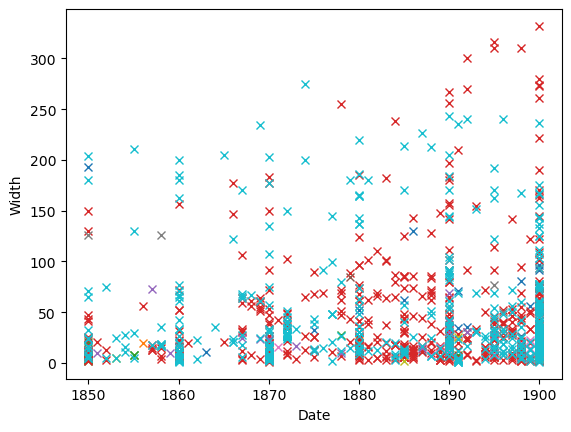

In [43]:
# Material=np.unique(mm)
ax = plt.subplot() 
for a in range(len(Material)):
    x=[]
    y=[]
    for b in range(len(yy)):
        if Material[a]==mm[b]:
            x.append(yy[b])
            y.append(ww[b])
    ax.plot(x, y, 'x')
        
plt.xlabel('Date')
plt.ylabel('Width')